The followings follow https://predictivemodeler.com/2019/02/23/r-basic-regression/

In [0]:
# "Concrete_Data.csv" means "/content/Concrete_Data.csv"
download.file("http://www.sakurai.comp.ae.keio.ac.jp/classes/TopicsML/Concrete_Data.csv","Concrete_Data.csv")

In [0]:
dat <- read.csv("Concrete_Data.csv", header = TRUE, fileEncoding="UTF-8-BOM")

In [0]:
nrow(dat) #number of rows; same as dim(dat)[1]

[1] 1030

In [0]:
ncol(dat) #number of columns; same as dim(dat)[2]

[1] 9

In [0]:
colnames(dat) <- c( "C1.Cement","C2.Blast.Furnace.Slag","C3.Fly.Ash","C4.Water","C5.Superplasticizer","C6.Coarse.Aggregate", "C7.Fine.Aggregate","Age","CCS" )

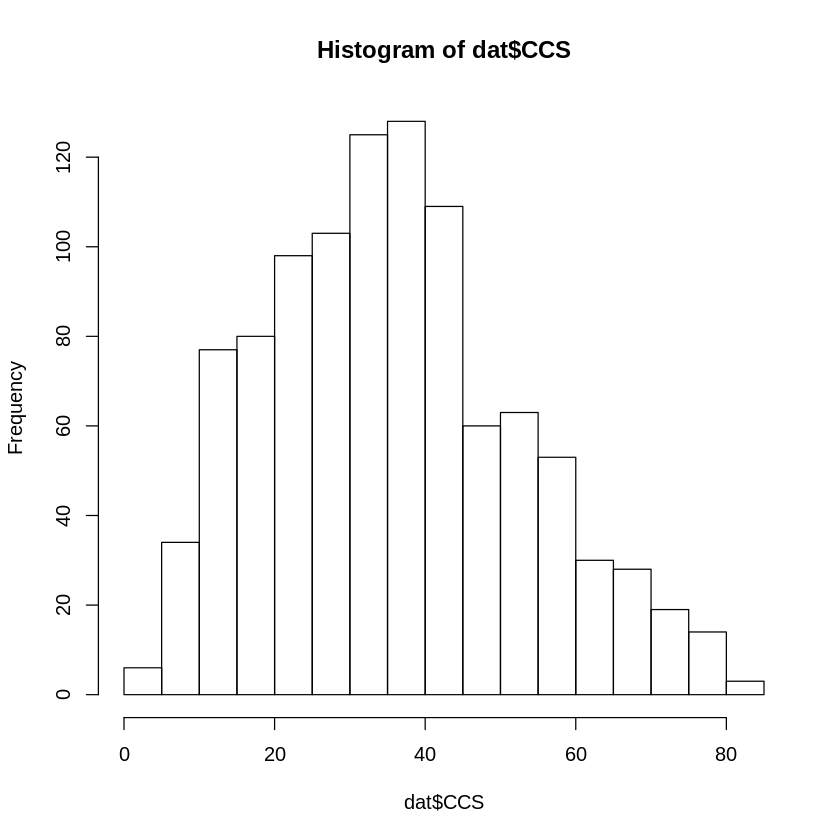

In [0]:
hist(dat$CCS)

In [0]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘mnormt’



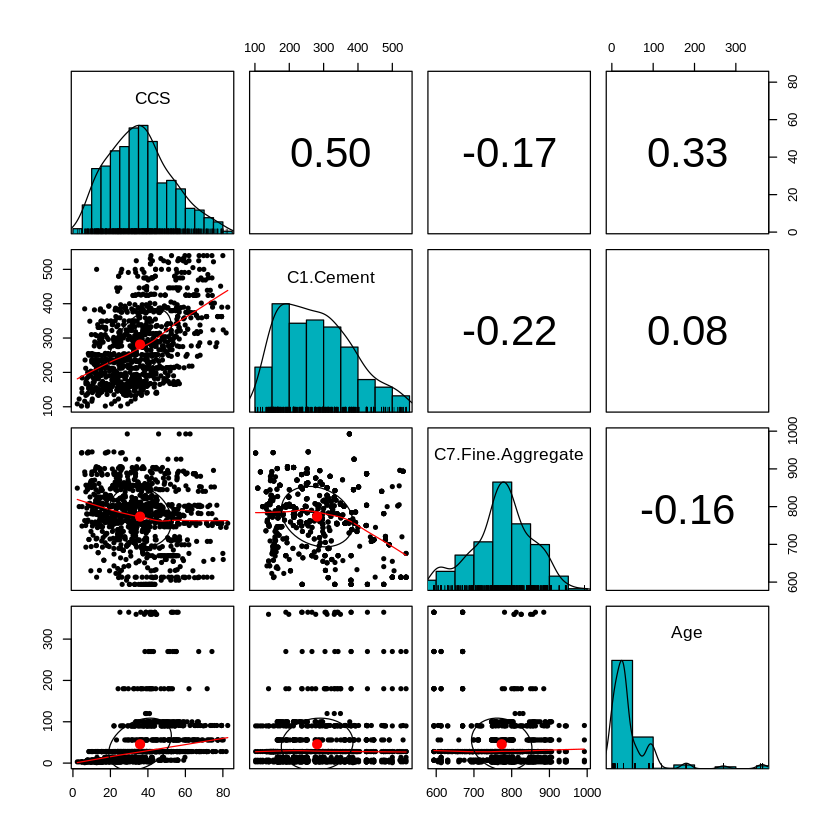

In [0]:
pairs.panels(dat[c(9,1,7:8)], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

In [0]:
mfull <- lm(CCS~.,data=dat)

In [0]:
summary(mfull)


Call:
lm(formula = CCS ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.654  -6.302   0.703   6.569  34.450 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -23.331214  26.585504  -0.878 0.380372    
C1.Cement               0.119804   0.008489  14.113  < 2e-16 ***
C2.Blast.Furnace.Slag   0.103866   0.010136  10.247  < 2e-16 ***
C3.Fly.Ash              0.087934   0.012583   6.988 5.02e-12 ***
C4.Water               -0.149918   0.040177  -3.731 0.000201 ***
C5.Superplasticizer     0.292225   0.093424   3.128 0.001810 ** 
C6.Coarse.Aggregate     0.018086   0.009392   1.926 0.054425 .  
C7.Fine.Aggregate       0.020190   0.010702   1.887 0.059491 .  
Age                     0.114222   0.005427  21.046  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.4 on 1021 degrees of freedom
Multiple R-squared:  0.6155,	Adjusted R-squared:  0.6125 
F-statistic: 204.

In [0]:
dat_pred <- cbind(dat, predict(mfull,dat,interval="prediction"))

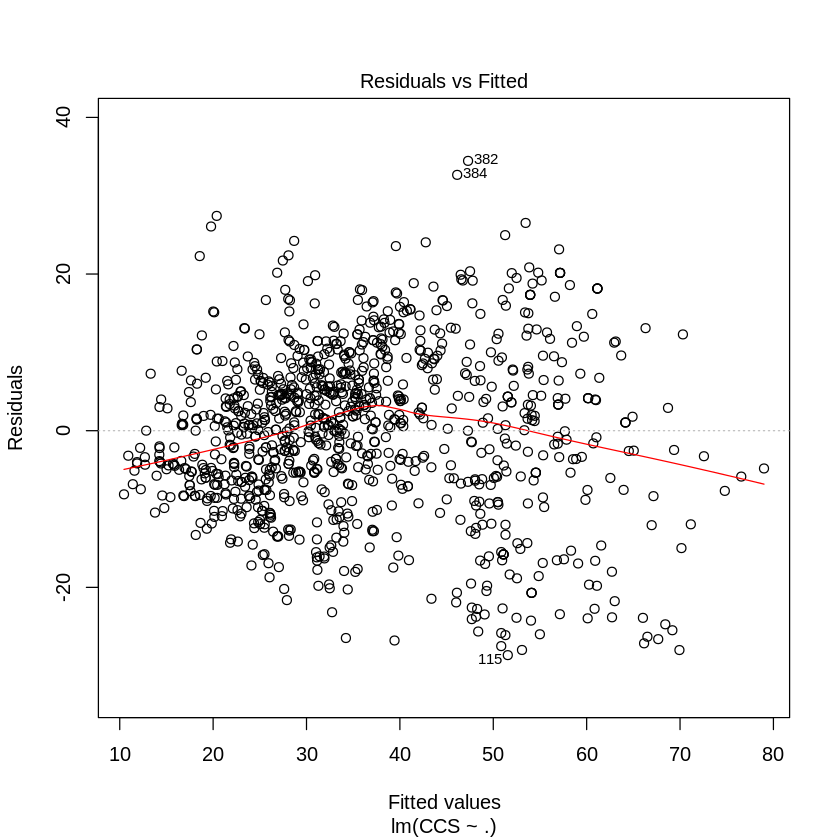

In [0]:
plot(mfull,1)

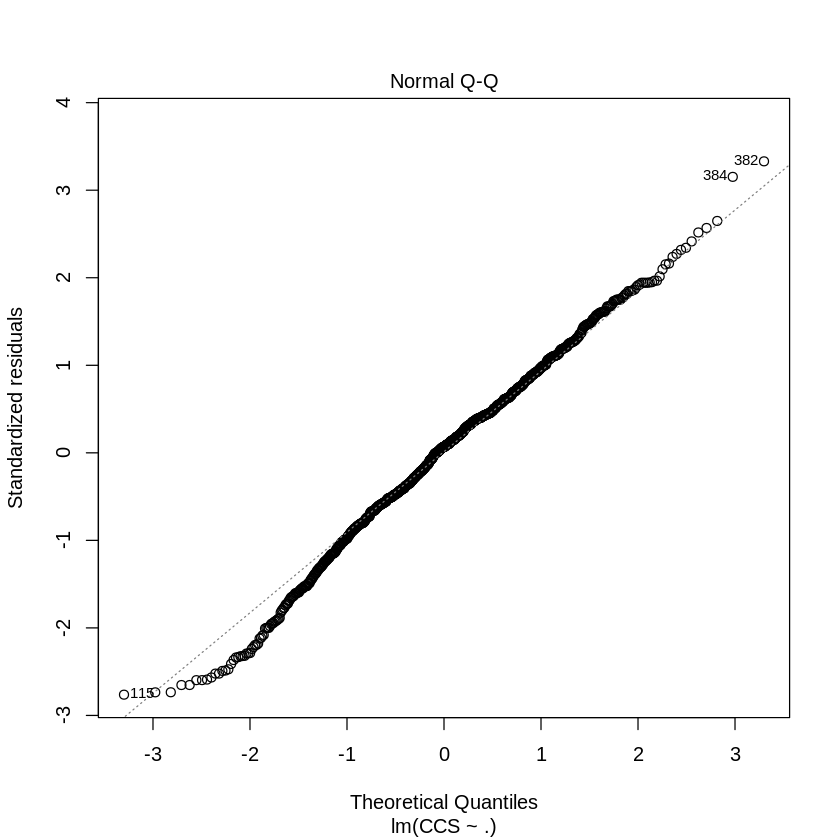

In [0]:
plot(mfull,2)

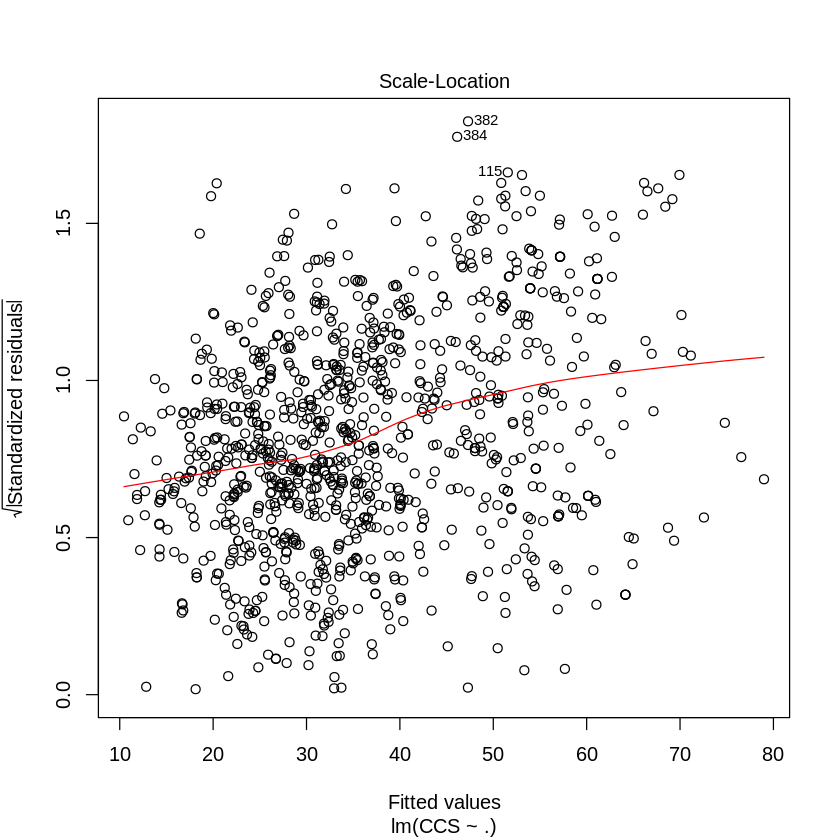

In [0]:
plot(mfull,3)

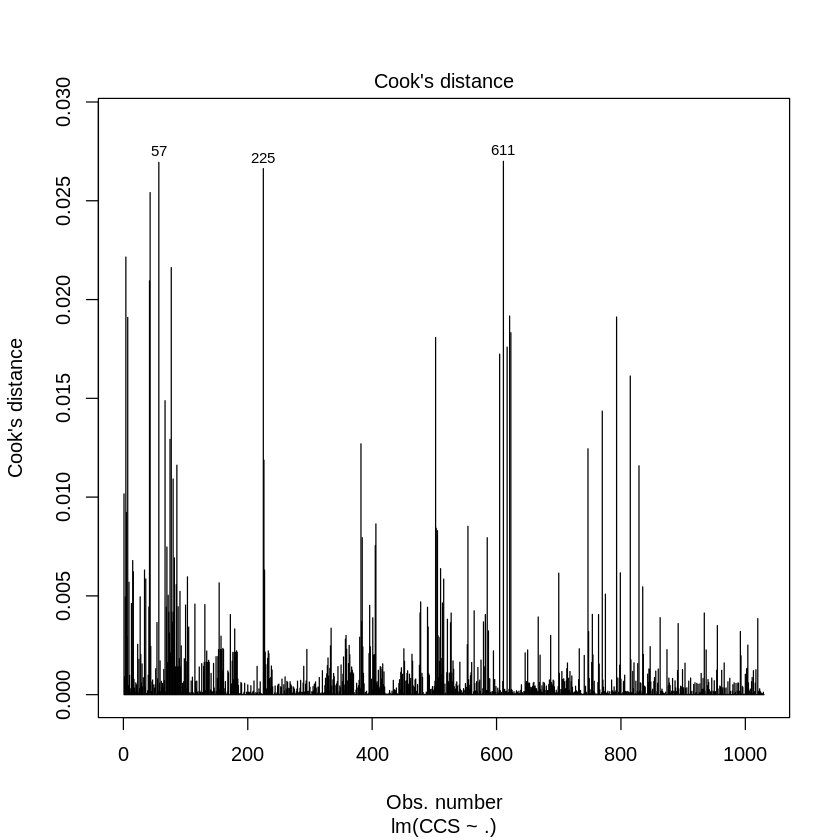

In [0]:
plot(mfull,4)

In [0]:
dat_pred[57,]

C1.Cement C2.Blast.Furnace.Slag C3.Fly.Ash C4.Water C5.Superplasticizer
57 475       0                     0          228      0                  
   C6.Coarse.Aggregate C7.Fine.Aggregate Age CCS   fit      lwr      upr     
57 932                 594               365 41.93 69.93492 49.21119 90.65865

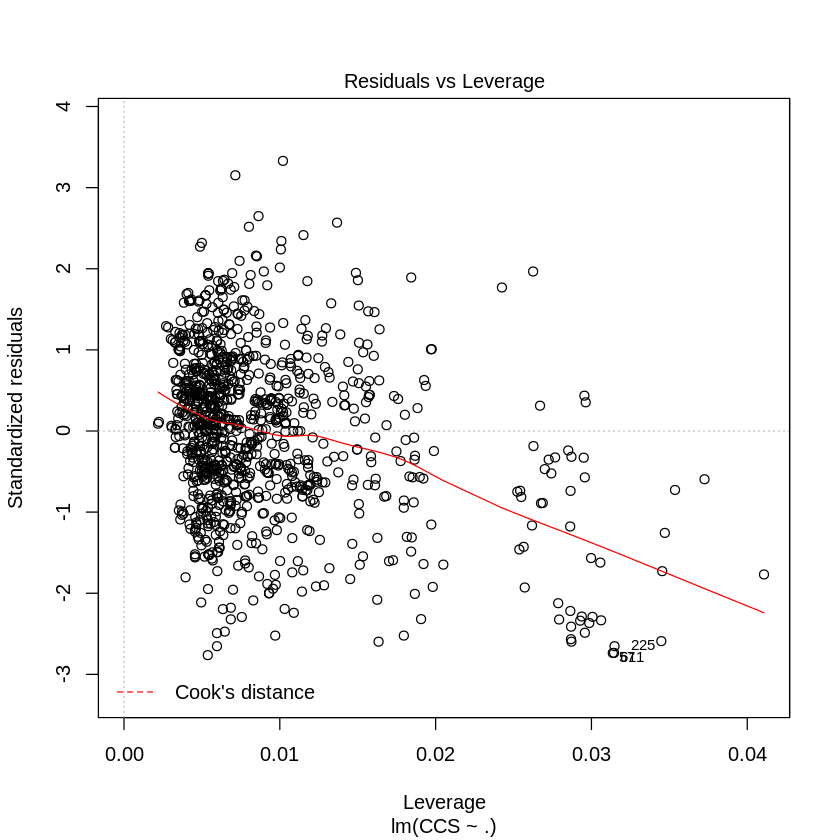

In [0]:
plot(mfull,5)

In [0]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



In [0]:
install.packages("leaps")
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
# Set seed for reproducibility
set.seed(123)
# Set up repeated k-fold cross-validation
train.control = trainControl(method = "cv", number = 10)
# Train the model
step.model = train(CCS ~., data = dat,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:8),
                    trControl = train.control
                    )
step.model$results

nvmax RMSE     Rsquared  MAE       RMSESD    RsquaredSD MAESD    
1 1     14.48957 0.2501768 11.863652 0.4867713 0.06992543 0.4383744
2 2     13.76133 0.3229607 11.239863 0.5543558 0.06507433 0.4027244
3 3     12.48072 0.4464543 10.141133 0.8264206 0.08736632 0.5687435
4 4     11.24063 0.5494140  9.027447 0.8716668 0.07921888 0.5076561
5 5     10.57485 0.6005955  8.360672 1.0723361 0.08285737 0.6349269
6 6     10.55469 0.6025896  8.395532 1.0045823 0.07790307 0.6726537
7 7     10.53579 0.6045685  8.374920 0.8667675 0.06790180 0.5620554
8 8     10.46342 0.6097856  8.305560 0.8291249 0.06503294 0.5551391

In [0]:
summary(step.model$finalModel)

Subset selection object
8 Variables  (and intercept)
                      Forced in Forced out
C1.Cement                 FALSE      FALSE
C2.Blast.Furnace.Slag     FALSE      FALSE
C3.Fly.Ash                FALSE      FALSE
C4.Water                  FALSE      FALSE
C5.Superplasticizer       FALSE      FALSE
C6.Coarse.Aggregate       FALSE      FALSE
C7.Fine.Aggregate         FALSE      FALSE
Age                       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         C1.Cement C2.Blast.Furnace.Slag C3.Fly.Ash C4.Water
1  ( 1 ) "*"       " "                   " "        " "     
2  ( 1 ) "*"       " "                   " "        " "     
3  ( 1 ) "*"       " "                   " "        "*"     
4  ( 1 ) "*"       "*"                   " "        "*"     
5  ( 1 ) "*"       "*"                   "*"        "*"     
6  ( 1 ) "*"       "*"                   "*"        "*"     
7  ( 1 ) "*"       "*"                   "*"        "*"     
8  ( 1 ) "*